# Slowness and velocity surfaces example

Example calculating stishovite phase velocity, group velocity and slowness surfaces, to reproduce figure 5 from Mainprice (2007).


Ref: Mainprice, D. Seismic anisotropy of the deep earth from a mineral and rock physics perspective.  Treatise in geophysics vol. 2, 437-492, 2007.


In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import pytasa.fundamental


In [16]:
stishovite_cij = np.array([[453.0, 211.0, 203.0,   0.0,   0.0,   0.0],
                           [211.0, 453.0, 203.0,   0.0,   0.0,   0.0],
                           [203.0, 203.0, 776.0,   0.0,   0.0,   0.0],
                           [  0.0,   0.0,   0.0, 252.0,   0.0,   0.0],
                           [  0.0,   0.0,   0.0,   0.0, 252.0,   0.0],
                           [  0.0,   0.0,   0.0,   0.0,   0.0, 302.0]])

stishovite_rho = 4290.0

In [17]:
azi=np.arange(-180.,181.,1)
inc=np.zeros_like(azi)

# Calculate velocities and slownesses
VGP, VGS1, VGS2, PE, S1E, S2E, SNP, SNS1, SNS2, VPP, VPS1, VPS2 = pytasa.fundamental.groupvels(stishovite_cij,stishovite_rho,inc,azi,slowout=True)

In [18]:
# Resort into SV and SH for plotting purposes

VGSV=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[VGS2.T,VGS1.T]).T
VGSH=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[VGS1.T,VGS2.T]).T

SVE=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[S2E.T,S1E.T]).T
SHE=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[S1E.T,S2E.T]).T

SNSV=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[SNS2.T,SNS1.T]).T
SNSH=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[SNS1.T,SNS2.T]).T

VPSV=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[VPS2.T,VPS1.T]).T
VPSH=np.choose((S1E[:,2]>S2E[:,2]).astype(int),[VPS1.T,VPS2.T]).T

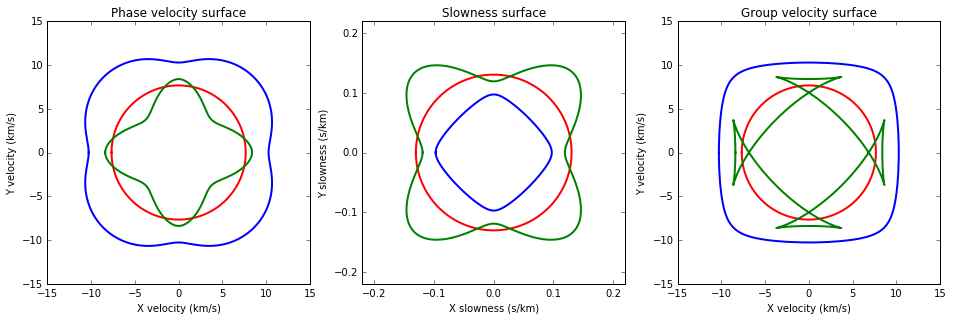

In [19]:
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,3,1)
ax.plot(VPP[:,0],VPP[:,1],c='b',linewidth=2)
# ax.quiver(VPP[::step,0],VPP[::step,1],PE[::step,0],PE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='b')
ax.plot(VPSV[:,0],VPSV[:,1],c='r',linewidth=2)
# ax.quiver(VPSV[::step,0],VPSV[::step,1],SVE[::step,0],SVE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='r')
ax.plot(VPSH[:,0],VPSH[:,1],c='g',linewidth=2)
#ax.quiver(VPSH[::step,0],VPSH[::step,1],SHE[::step,0],SHE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='g')
ax.set_aspect('equal')
ax.set_title('Phase velocity surface')
ax.set_xlabel('X velocity (km/s)')
ax.set_ylabel('Y velocity (km/s)')


step=50
ax = fig.add_subplot(1,3,2)
ax.plot(SNP[:,0],SNP[:,1],c='b',linewidth=2)
#ax.quiver(SNP[::step,0],SNP[::step,1],PE[::step,0],PE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='b')
ax.plot(SNSV[:,0],SNSV[:,1],c='r',linewidth=2)
#ax.quiver(SNSV[::step,0],SNSV[::step,1],SVE[::step,0],SVE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='r')
ax.plot(SNSH[:,0],SNSH[:,1],c='g',linewidth=2)
#ax.quiver(SNSH[::step,0],SNSH[::step,1],SHE[::step,0],SHE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='g')
ax.set_xlim(-0.22,0.22)
ax.set_ylim(-0.22,0.22)
ax.set_aspect('equal')
ax.set_title('Slowness surface')
ax.set_xlabel('X slowness (s/km)')
ax.set_ylabel('Y slowness (s/km)')


ax = fig.add_subplot(1,3,3)
ax.plot(VGP[:,0],VGP[:,1],c='b',linewidth=2)
# ax.quiver(VGP[::step,0],VGP[::step,1],PE[::step,0],PE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='b')
ax.plot(VGSV[:,0],VGSV[:,1],c='r',linewidth=2)
# ax.quiver(VGSV[::step,0],VGSV[::step,1],SVE[::step,0],SVE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='r')
ax.plot(VGSH[:,0],VGSH[:,1],c='g',linewidth=2)
# ax.quiver(VGSH[::step,0],VGSH[::step,1],SHE[::step,0],SHE[::step,1],pivot='mid',headwidth=0,headlength=0,headaxislength=0,width=0.005,color='g')
ax.set_aspect('equal')
ax.set_title('Group velocity surface')
ax.set_xlabel('X velocity (km/s)')
ax.set_ylabel('Y velocity (km/s)')

# fig.savefig('reproduce_mainprice_vel_slow.png')

In [21]:
print('Phase Velocity km/s')
print('P  min max: '), min([np.linalg.norm(i) for i in VPP]), max([np.linalg.norm(i) for i in VPP])
print('SH min max: '), min([np.linalg.norm(i) for i in VPSH]), max([np.linalg.norm(i) for i in VPSH])
print('SV min max: '), min([np.linalg.norm(i) for i in VPSV]), max([np.linalg.norm(i) for i in VPSV])

print('Slowness s/km')
print('P  min max: '), min([np.linalg.norm(i) for i in SNP]), max([np.linalg.norm(i) for i in SNP])
print('SH min max: '), min([np.linalg.norm(i) for i in SNSH]), max([np.linalg.norm(i) for i in SNSH])
print('SV min max: '), min([np.linalg.norm(i) for i in SNSV]), max([np.linalg.norm(i) for i in SNSV])

print('Group Velocity km/s')
print('P  min max: '), min([np.linalg.norm(i) for i in VGP]), max([np.linalg.norm(i) for i in VGP])
print('SH min max: '), min([np.linalg.norm(i) for i in VGSH]), max([np.linalg.norm(i) for i in VGSH])
print('SV min max: '), min([np.linalg.norm(i) for i in VGSV]), max([np.linalg.norm(i) for i in VGSV])

Phase Velocity km/s
P  min max:  10.2759138569 12.1567079337
SH min max:  5.31085004544 8.39024853007
SV min max:  7.66428462032 7.66428462032
Slowness s/km
P  min max:  0.0822591120436 0.0973149457971
SH min max:  0.119185980775 0.188293774338
SV min max:  0.130475321513 0.130475321513
Group Velocity km/s
P  min max:  10.2759138569 12.1567079337
SH min max:  5.31085004544 9.39550168058
SV min max:  7.66428462032 7.66428462032
